In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
##########################
save_history = False # if true, updates portfolio and platform history files.
##########################
today = pd.to_datetime('today').normalize()
loans_df = pd.read_csv('data/concatenated.csv')
cash_df = pd.read_csv('data/cash.csv', index_col='platform_account_name')
transactions_df = pd.read_csv('data/transactions.csv')
portfolio_df = pd.read_csv('data/portfolio_history.csv', index_col=0, parse_dates=[0])
platform_dict = { 'loanpad':'Loanpad 60d Access','proplend':'Proplend','crowdproperty':'CrowdProperty AutoInvest','invest_fund':'Invest & Fund','assetz_capital':'Assetz Capital 90d Access','kuflink':'Kuflink 24m Term 28133' }
col_list = ['IB amt','Non-IB','Total amt','No loans','Avg loan amt','Avg net AER','Blended LTV','Avg term','Max term','Avg ttm','Max ttm','Avg ext','Ext 90d','Non-perform','Long default','Short default','Int default','DPI','RVPI','TVPI']
platform_totals_list = [loans_df['loan_part_amt'].sum() + cash_df['ib_cash'].sum(),cash_df['nonib_cash'].sum(),loans_df['loan_part_amt'].sum() + cash_df['ib_cash'].sum() + cash_df['nonib_cash'].sum(),loans_df['loan_portion'].sum(),loans_df['loan_part_amt'].sum() / loans_df['loan_portion'].sum(),loans_df['portfolio_weighted_net_aer'].sum(),loans_df['portfolio_weighted_blended_ltv'].sum(),loans_df['portfolio_weighted_term_months'].sum(),loans_df['loan_part_term_months'].max(),loans_df['portfolio_weighted_ttm_months'].sum(),loans_df['loan_part_ttm_days'].max()/33.437,loans_df['portfolio_weighted_maturity_extended_days'].sum(),loans_df.loc[loans_df['loan_part_maturity_extended_days'] > 90, 'loan_part_amt'].sum() / loans_df['loan_part_amt'].sum(),loans_df.loc[loans_df['loan_part_status'].isin(['Short Default', 'Long Default', 'Interest Default']), 'loan_part_amt'].sum() / loans_df['loan_part_amt'].sum(),loans_df.loc[loans_df['loan_part_status'] == 'Long Default', 'loan_part_amt'].sum(),loans_df.loc[loans_df['loan_part_status'] == 'Short Default', 'loan_part_amt'].sum(),loans_df.loc[loans_df['loan_part_status'] == 'Interest Default', 'loan_part_amt'].sum(), loans_df.loc[loans_df['platform_account_sector'] == 'Development']['loan_part_amt'].sum()/loans_df['loan_part_amt'].sum(),loans_df.loc[loans_df['platform_account_sector'] == 'Commercial']['loan_part_amt'].sum()/loans_df['loan_part_amt'].sum(),len(platform_dict),loans_df['loan_part_amt'].sum() / len(platform_dict),
1,                       
2,
3]
format_dict = { 'IB amt': '£{0:,.2f}','Non-IB': '£{0:,.2f}','Total amt': '£{0:,.2f}','No loans': '{:,.0f}','Avg loan amt': '£{0:,.2f}','Blended LTV': '{:,.0%}','Avg net AER': '{:,.1%}','Avg term': '{:,.0f}','Max term': '{:,.0f}','Avg ttm': '{:,.0f}','Max ttm': '{:,.0f}','Avg ext': '{:,.0f}','Ext 90d': '{:,.0%}','Non-perform': '{:,.0%}','Long default': '£{0:,.0f}','Short default': '£{0:,.0f}','Int default': '£{0:,.0f}','Dev sector': '{:.0%}', 'Comm sector': '{:.0%}','No a/c': '{:,.0f}','Avg a/c amt': '£{0:,.0f}','DPI': '{0:,.2f}', 'RVPI': '{0:,.2f}', 'TVPI' : '{0:,.2f}'}
colours_list = ['green','blue','red','orange','purple','pink']
def save_platform_csv(platform): # function to update platform_history.csv for all platform accounts
    exec(platform + "_df = pd.read_csv('data/" + platform + "_history.csv', index_col=0, parse_dates=[0])") # read platform _history.csv
    exec(platform + "_df.loc[today] = platform_row") # append platform row
    exec(platform + "_df.to_csv('data/" + platform + "_history.csv', index=True)") # save platform _history.csv

### Platforms

In [25]:
platform_df = pd.DataFrame(columns=col_list)
for platform in platform_dict:
    platform_account_name = platform_dict[platform]
    platform_loans = loans_df.loc[(loans_df['platform_account_name'] == platform_account_name) & (loans_df['loan_part_status'] != 'Repaid')]
    platform_ib_cash = cash_df.loc[platform_account_name]['ib_cash']
    platform_nonib_cash = cash_df.loc[platform_account_name]['nonib_cash']
    platform_deployed_amt = platform_loans['loan_part_amt'].sum() + platform_ib_cash
    platform_total_amt = platform_deployed_amt + platform_nonib_cash
    platform_extended_pct = platform_loans.loc[platform_loans['loan_part_maturity_extended_days'] > 90, 'loan_part_amt'].sum() / platform_deployed_amt
    platform_nonperform_pct = platform_loans.loc[platform_loans['loan_part_status'].isin(['Short Default', 'Long Default', 'Interest Default']), 'loan_part_amt'].sum() / platform_deployed_amt
    platform_avg_loan_amt = platform_loans['loan_part_amt'].sum() / platform_loans['loan_portion'].sum()
    platform_transactions = transactions_df.loc[transactions_df['platform_account_name'] == platform_account_name]
    platform_paid_in = platform_transactions.loc[platform_transactions['trx_type'] == 'Paid in', 'trx_amt'].abs().sum()
    platform_distributions = platform_transactions.loc[platform_transactions['trx_type'] == 'Distribution', 'trx_amt'].abs().sum()
    platform_dpi = np.where(platform_distributions != 0, platform_distributions/platform_paid_in, 0)
    platform_row = [platform_deployed_amt, platform_nonib_cash, platform_total_amt, platform_loans['loan_portion'].sum(), platform_avg_loan_amt, platform_loans['platform_weighted_net_aer'].sum(), platform_loans['platform_weighted_blended_ltv'].sum(), platform_loans['platform_weighted_term_months'].sum(), platform_loans['loan_part_term_months'].max(), platform_loans['platform_weighted_ttm_months'].sum(), platform_loans['loan_part_ttm_days'].max()/33.437, platform_loans['platform_weighted_maturity_extended_days'].sum(), platform_extended_pct, platform_nonperform_pct, platform_loans.loc[platform_loans['loan_part_status'] == 'Long Default', 'loan_part_amt'].sum(),platform_loans.loc[platform_loans['loan_part_status'] == 'Short Default', 'loan_part_amt'].sum(),platform_loans.loc[platform_loans['loan_part_status'] == 'Interest Default', 'loan_part_amt'].sum(),
                   platform_dpi,
                   platform_total_amt / platform_paid_in,
                   (platform_dpi + platform_total_amt) / platform_paid_in]
    if save_history == True:
        save_platform_csv(platform) # function to update platform_history.csv for all platform accounts
    platform_df.loc[platform_account_name] = platform_row
platform_df.style.format(format_dict)

,IB amt,Non-IB,Total amt,No loans,Avg loan amt,Avg net AER,Blended LTV,Avg term,Max term,Avg ttm,Max ttm,Avg ext,Ext 90d,Non-perform,Long default,Short default,Int default,DPI,RVPI,TVPI
Loanpad 60d Access,"£5,580.00",£7.14,"£5,587.14",227,£24.26,6.6%,44%,2,2,2,2,90,31%,1%,£0,£0,£41,0.00,1.12,1.12
Proplend,"£3,000.00",£5.45,"£3,005.45",3,"£1,000.00",6.7%,50%,28,36,17,25,0,0%,67%,£0,"£1,000","£1,000",0.10,1.00,1.00
CrowdProperty AutoInvest,"£1,717.85",£0.00,"£1,717.85",30,£57.26,7.8%,62%,15,23,6,15,0,0%,66%,£979,£150,£0,0.19,0.86,0.86
Invest & Fund,"£3,117.30",£4.54,"£3,121.84",20,£155.87,7.2%,66%,11,24,6,16,3,1%,0%,£0,£0,£0,0.00,1.25,1.25
Assetz Capital 90d Access,£680.35,£46.10,£726.45,162,£4.20,4.1%,59%,53,103,16,43,0,0%,19%,£19,£28,£80,0.31,0.72,0.72
Kuflink 24m Term 28133,"£1,050.99",£0.00,"£1,050.99",145,£7.20,7.9%,61%,24,24,12,11,141,38%,19%,£0,£0,£197,0.00,1.05,1.05


### Portfolio

In [4]:
portfolio_df.loc[today] = platform_totals_list
if save_history == True:
    portfolio_df.to_csv('data/portfolio_history.csv', index=True)
portfolio_df.sort_index(ascending=False).style.format_index(lambda s: s.strftime('%Y-%m')).format(format_dict)

,IB amt,Non-IB amt,Total amt,No loans,Avg loan amt,Avg net AER,Blended LTV,Avg term,Max term,Avg ttm,Max ttm,Avg ext,Ext 90d,Non-perform,Long default,Short default,Int default,Dev sector,Comm sector,No a/c,Avg a/c amt
2024-08,"£15,146.49",63.230000,"£15,209.72",587,£25.67,6.9%,54%,14,103,7,43,44,15%,23%,£999,"£1,128","£1,318",76%,24%,6,"£2,511"
2024-08,"£15,146.49",63.230000,"£15,209.72",587,£25.67,6.9%,54%,14,103,7,43,44,15%,23%,£999,"£1,128","£1,318",76%,24%,6,"£2,511"
2024-06,"£14,783.45",36.950000,"£14,820.40",591,£24.82,6.9%,53%,14,103,7,43,42,16%,17%,£942,£245,"£1,310",75%,25%,6,"£2,445"
2024-03,"£14,885.53",136.500000,"£15,022.03",571,£25.81,6.9%,54%,15,86,8,44,49,20%,16%,£721,£400,"£1,224",75%,25%,6,"£2,457"
2023-12,"£14,817.62",117.630000,"£14,935.25",544,£27.07,6.9%,54%,15,78,9,47,nan,nan%,14%,£270,£531,"£1,228",74%,26%,6,"£2,454"
2023-11,"£14,448.47",440.010000,"£14,888.48",552,£25.82,6.8%,54%,15,78,9,48,nan,nan%,6%,£122,£479,£285,73%,27%,6,"£2,376"
2023-10,"£14,741.91",89.840000,"£14,831.75",559,£26.04,6.5%,53%,14,78,7,49,nan,nan%,4%,£122,£333,£200,74%,26%,6,"£2,426"
2023-09,"£14,606.01",410.190000,"£15,016.20",588,£24.69,6.4%,54%,14,83,7,50,nan,nan%,3%,£124,£118,£220,73%,27%,6,"£2,419"
2023-08,"£14,672.50",119.500000,"£14,792.00",596,£24.52,6.3%,54%,14,83,8,51,nan,nan%,4%,£122,£270,£225,74%,26%,6,"£2,436"


[Text(5, 0, '£24.26'),
 Text(5, 0, '£1,000.00'),
 Text(5, 0, '£57.26'),
 Text(5, 0, '£155.87'),
 Text(5, 0, '£4.20'),
 Text(5, 0, '£7.20')]

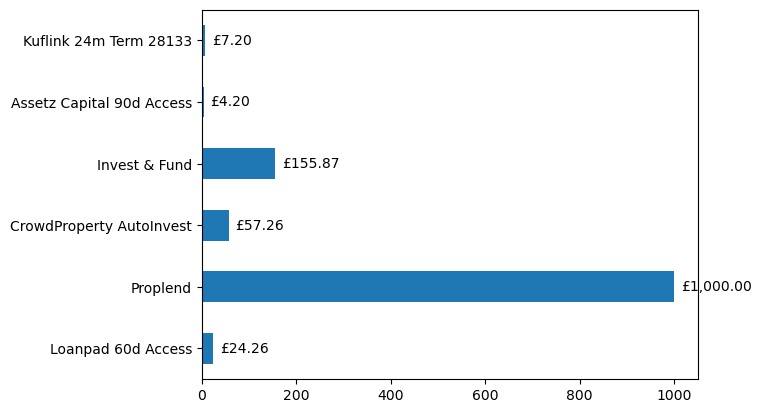

In [5]:
ax = platform_df.plot.barh(y='Avg loan amt', legend=False)
ax.bar_label(ax.containers[0], fmt='£{0:,.2f}', label_type='edge', padding=5)

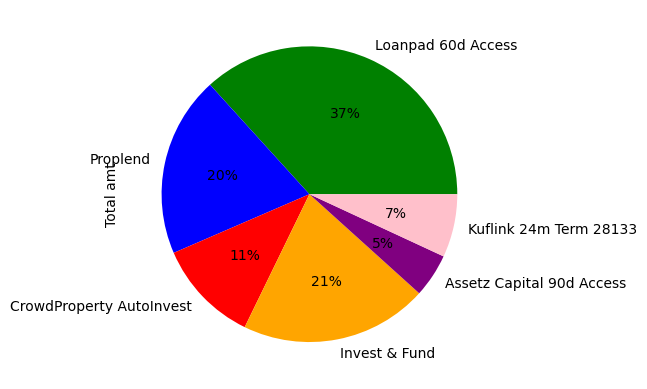

In [6]:
ax = platform_df['Total amt'].plot(kind='pie', colors=colours_list, autopct='%1.0f%%', legend=False)

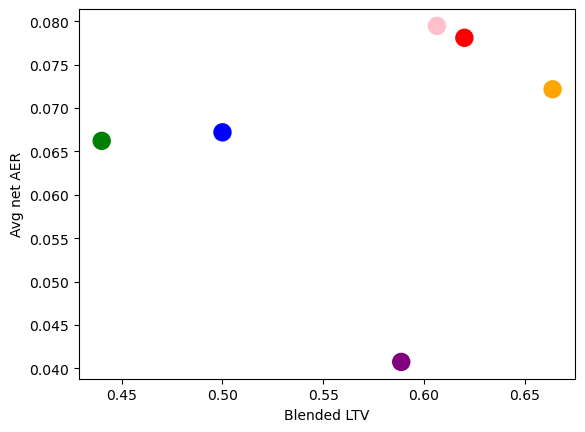

In [7]:
ax = platform_df.plot(kind='scatter', x='Blended LTV', y='Avg net AER', s=150, c=colours_list)